# Data Programming Project

# 1 Aims, objectives and background

## 1.1 Introduction
This project aims to explore and analyze an effective strategy used in a game called Fantasy Premier League (FPL). Fantasy Premier League is a type of Fantasy Football game that is hugely popular, winners of the game can win attractive prizes. Participants of the game assemble an imaginary team of real life football players and gain points according to their statistical performance in real life. With this premise, a python script can gather statistical data and help predict and select the best possible team for an FPL season.

This project was inspired by a research by O’Brien JD et al. (2021) [[1]](#ref) which explores participants' skills required when playing the game FPL. The author analyzed a large dataset of approximately one million participants playing Fantasy Premier League and identified several common behaviours amongst the top ranking participants. One of them is that higher tier participants have built a better-prepared team prior to the start of the season and also have selected a few strong core players in their fpl team.

For this project want to implement a strategy with data science techniques to select an FPL squad that can compete against the top participants of FPL. I also want to use data science techniques to explore interesting relationships between the performance of football players and other contributing factors which may aid in selecting FPL squad.

Some important terminolgy:
- FPL - Fantasy Premier League (Online game)
- EPL - English Premier League (Professional Football League)
- ROI - Return on investment
- Week - Football players usually play 1 EPL football game per week, points in FPL are calculated weekly based on players' -performance in EPL
- Player - Professional Football player from EPL
- Participant/contestant - Users who are playing FPL
- Cost of player - The amount of FPL dollars required to add a player to our FPL team (Not related to the real-life cost of the player)
- Team - Professional football team i.e. Spurs
- FPL Squad - FPL squad made up of 15 players
- FPL Team - 11 players selected from FPL squad weekly
- Transfer - Change of players within the FPL squad


## 1.2 Aims and objectives

Within this project, I would like to explore the following:

- Is there a correlation between players FPL points and their team’s position in the English Premier league?
- Does less playing time of a player affects FPL points obtained?
- Can we identify which player position require the most investment in FPL?
- Can we identify under-valued and over-valued players and invest our FPL dollars budget accordingly?
- Is the strategy to select players by return on investment effective?

For this project proposal, my aims are to:

1. Decide how much data is required to sufficiently explore the above questions, taking into consideration constraints on time and resource
2. Collect the data and store in a form which allows for data cleaning and analysis
3. Clean and transform the data such that it is suitable for use in the techniques I would like to utilise later
4. Implement a strategy which pick players for FPL team based on players ROI
5. Implement backtesting for our ROI selection strategy

## 1.3 Rules of fantasy premier league
When playing fantasy premier league, there are several rules to the game that the participants have to follow [[2]](#ref). Below is a short summary of the rules:

1. The participant must select a fantasy football squad of 15 players, consisting of 2 Goalkeepers, 5 Defenders, 5 Midfielders, and 3 Forwards
2. The total value of the participant's initial squad must not exceed £100 million.
3. Each participant can only select up to 3 players from the same Premier League team.
4. Every participant must choose 11 players from their squad as their team for that week and will be awarded points total from the sum of the performances of these players.
5. The participant also must designate a single player of the 11 to be the captain, with the manager receiving double this player’s points total in that week.
6. Between consecutive game weeks the participant may also make one unpenalized change to their team, with additional changes coming as a deduction in their points total.
7. The price of a given player then fluctuates as a result of the supply-and-demand dynamic arising from the transfers across all participants’ rosters
8. Participants can use chips to help improve their score/squad. There are a total of 4 types of chips:
    - Bench Boost: allow participants to make points from all of the substitutes in their squad for a single game week
    - Triple Captain: Designate 3 captains for a single game week
    - Free Hit: unlimited transfers in a single game week, but the changes are only effective limit to the week Free Hit is used
    - Wildcard: unlimited transfers in a single game week

## 1.4 Data
### 1.4.1 Data requirements
I decided to collect data from the official API of fantasy premier league mainly because of two factors: reliability and speed. The data provided is official game data provided by the host of the FPL game. There are minimal risks of faults within data collected. Data collected from this API is also up-to-date. Extracting data from the official API is also much faster than using other sources of data extraction.


### 1.4.2 Limitations and constraints of the data
Data collected from the official FPL official API do not contain past season's game week data. At the point of writing this report the current FPL season 2021/22 has just ended and the API has 38 weeks of game week data. However, these game week data will no longer be possible to obtained from the API once next season begins. Hence, I will be storing these game week data in CSV format. While it is possible to obtain game week data of past season from external sources, but due to time and resource constraints, I will not be doing so in this project.

Data collected from the official FPL official API does not contain some statistics of football players i.e number of shots on target, passes completed. These data can be obtained from other sources however it is not possible here due to time and resource constraints.

The FPL official API is not well documented. I had to rely on serveral external sources to use the FPL official API.

## 1.5 Ethical considerations
According to Football Association Premier League Limited, it is forbidden to upload, post, publish, transmit, reproduce, distribute or in any way exploit any information or other material obtained through the game for commercial purposes (other than as expressly permitted by the provider of such information or other material) [[2]](#ref). It is also forbidden to use automated systems to access the Game and extract information from the Game [[2]](#ref). This project is not intended for commercial purposes and it is not automated, hence it is within legal bounds to use data obtained from the game for research purposes.

All data used is in the public sphere, therefore so no anonymization of data is required.

## Imports

Packages for handling data and ploting diagrams. For this code to run, please install the following libraries and their dependencies:
- requests
- json
- pandas
- matplotlib
- numpy
- os
- sklearn
- tqdm

Use pip install (name of library) in your command line.

In [42]:
import requests, json
import pandas as pd
# pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt
import numpy as np
import os
from tqdm.auto import tqdm;
from sklearn.linear_model import LinearRegression
tqdm.pandas()

# 2 Collecting Data from API

# 2.1 Defining URL
In the cell below we will declare the base URL of the official fantasy premier league API. This URL will be used frequently in this program for further extraction of data. 


In [2]:
url = 'https://fantasy.premierleague.com/api/'

# 2.1 Defining Data Extraction Function
Firstly, the following functions are created to load data from the FPL official API as data of the current FPL season is required for the purpose of this script. 

## 2.1.1 Player Data
This 'loadData()' function will request data from the FPL official API using the requests library to access different endpoints of the FPL official API. 

Sending a GET request to https://fantasy.premierleague.com/api/bootstrap-static/ will result in a JSON format response to be returned. These data is of the following format:

{ 'element_stats': [...],  
  'element_types': [...],  
  'elements': [...],  
  'events': [...],  
  'game_settings': {...},  
  'phases': [...],  
  'teams': [...],  
  'total_players': 9167407}  


'teams' consist of information of all teams within that are currently available for selection, 'element_types' consist of all positional information that users can select for this season of FPL game, and 'elements' consist of all player information at this current season. The mentioned data will be essential to performing calculations required for the script. Data manipulation will be required to combine different data sources together for our usage. These functions will be carried out using the loadData function below.

In [3]:
def get_season_history(row,season_name):
    '''get total points of players from season name in argument'''
    
    # send GET request to https://fantasy.premierleague.com/api/element-summary/{PID}/
    r = requests.get(
            url + 'element-summary/' + str(row['id_x']) + '/'
    ).json()
    
    # extract 'history_past' data from response into dataframe
    df = pd.json_normalize(r['history_past'])
    try:
        A = df.loc[df['season_name'] == season_name].reset_index()
        return A.at[0,'total_points']
    except:
        return 0


In [4]:
def loadData(season_name):
    '''
    Get players total points from the season name in argument, return a player dataframe.
    '''

    # get data from bootstrap-static endpoint
    r = requests.get(url+'bootstrap-static/').json()
    
    
    pd.set_option('display.max_columns', None)

    # Teams
    teams = pd.json_normalize(r['teams'])

    # get position information from 'element_types' field
    positions = pd.json_normalize(r['element_types'])

    #create players dataframe
    players = pd.json_normalize(r['elements'])


    # Combine and clean data
    # join player to teams
    cleanData = pd.merge(
        left=players,
        right=teams,
        left_on='team',
        right_on='id'
    )

    # join player positions
    cleanData  = cleanData.merge(
        positions,
        left_on='element_type',
        right_on='id'
    )

    # rename columns
    cleanData  = cleanData.rename(
        columns={'name':'team_name', 'singular_name_short':'position_name'}
    )

    #Merge first name and second name together
    cleanData ['player_name'] = cleanData ['first_name'] +' '+ cleanData['second_name']

    #Obtain season history data depend on which season the argument is
    if season_name != 'current':
        cleanData['total_points'] = cleanData.progress_apply(get_season_history,args=[season_name],axis=1)

    #Rename column
    cleanData.rename(columns = {'id_x':'player_id'}, inplace = True)

    #Select columns that is required for our purpose in this script
    players_wanted_features = ['player_name', 'team_name','position_name','total_points', 'now_cost', 'unavailable', 'minutes','player_id']
    playersDF = cleanData[players_wanted_features].copy()

    #Calculate ROI and place in ROI column
    playersDF['roi'] = playersDF['total_points'] / playersDF['now_cost']

    #Sort Dataframe by ROI
    playersDF = playersDF.sort_values(by='roi', ascending=False)
    
    #Return dataframe
    return playersDF


playersDF21_22 = loadData("2021/22")

playersDF20_21 = loadData("2020/21")

100%|██████████| 737/737 [02:52<00:00,  4.28it/s]


### 2.1.1.1 Check Data

In [5]:
# Drop all rows with NA in it.
playersDF21_22.dropna()
playersDF20_21.dropna()


playersDF21_22.sample(20)

,player_name,team_name,position_name,total_points,now_cost,unavailable,minutes,player_id,roi
654,Jamal Lewis,Newcastle,DEF,10,42,False,261,311,0.238095
684,Davinson Sánchez,Spurs,DEF,93,42,False,1626,367,2.214286
159,Maxwel Cornet,Burnley,MID,104,58,False,1764,578,1.793103
618,Rhys Williams,Liverpool,DEF,0,44,False,0,247,0.000000
250,Harvey Elliott,Liverpool,MID,12,53,False,344,506,0.226415
577,Michael Keane,Everton,DEF,102,46,False,2791,169,2.217391
86,Ainsley Maitland-Niles,Arsenal,MID,12,52,False,263,13,0.230769
156,Josh Benson,Burnley,MID,0,45,False,0,116,0.000000
661,Max Aarons,Norwich,DEF,55,43,False,2879,326,1.279070
419,Joseph McGlynn,Burnley,FWD,0,45,False,0,735,0.000000


As seen from above, the dataframe that was created as a result of the 'loadData("2021/22")' function is a list of players along with their respective cummulative data from the season '2021/22'. This relationships between data in the dataframe will be explored further in the following sections.

### 2.1.1.2 Export player data to CSV file

In [6]:
cwd = os.getcwd()

# Export 2021/22 Dataframe to CSV file
path = cwd + "/Data/playersData_2021-22-1.csv"
playersDF21_22.to_csv(path, index=False);

# Export 2020/21 Dataframe to CSV file
path = cwd + "/Data/playersData_2020-21-1.csv"
playersDF20_21.to_csv(path, index=False);

## 2.1.2 Player weekly data for backtest
The function below will be used to obtain data of each player for each different gameweeks. This allows the program to breakdown players' score obtained for each gameweek. The data collected will be utilized for backtesting so that we can see how well our team picking strategy works.

In [7]:
def get_gameweek_details(player_id):
    '''get all gameweek details for a given player_id'''
    
    # send GET request to
    # https://fantasy.premierleague.com/api/element-summary/{PID}/
    r = requests.get(
            url + 'element-summary/' + str(player_id) + '/'
    ).json()
    
    # extract 'history' data from response into dataframe
    df = pd.json_normalize(r['history'])
    
    return df


In [8]:
# First we load a datafrome from the CSV file created by the loadData function above
playersDF21_22 = pd.read_csv("playersData_2021-22.csv")

# we use the get_gameweek_details function on each player id of the players in playersDF21_22
points = playersDF21_22['player_id'].progress_apply(get_gameweek_details)

# combine all player gameweek details into single dataframe
points = pd.concat(df for df in points)

# we can now merge the gameweek details datframe with the playersDF21_22 datapframe
points = playersDF21_22[['player_id','player_name','team_name','position_name']].merge(
    points,
    left_on='player_id',
    right_on='element'
)


# Separate out the values that we need
backtestdf = points[['player_id','player_name', 'team_name','position_name','round','value','total_points']].copy()


# Get the cummulative sum of the points that each player earns per week, this is used for backtesting so that
# our algorithm have knowledge of the players total amount of points at that current week
backtestdf['cum_points'] = backtestdf.groupby(['player_name'])['total_points'].cumsum()



100%|██████████| 737/737 [02:03<00:00,  5.96it/s]


### 2.1.2.1 Check Data

In [9]:


# Check for errors, some players may have faulty initial stats we will remove all existing errors
error_ids = backtestdf.loc[(backtestdf['round'] == 1) & (backtestdf['cum_points'] > backtestdf['total_points'])]['player_id']

for i in error_ids:
    backtestdf.drop(backtestdf[backtestdf.player_id == i].index, inplace=True)
    

# Check if any errors still exist in data frame
isempty = backtestdf.loc[(backtestdf['round'] == 1) & (backtestdf['cum_points'] > backtestdf['total_points'])].empty

# Print response if there is any error in datafrome
if (isempty):
    print('No errors!')
else:
    print('Error!')
    
    
backtestdf.sample(20)


No errors!


,player_id,player_name,team_name,position_name,round,value,total_points,cum_points
24901,560,Haydon Roberts,Brighton,DEF,29,39,0,0
16486,544,Jarrad Branthwaite,Everton,DEF,14,40,0,0
1959,365,Pierre-Emile Højbjerg,Spurs,MID,29,49,2,82
15192,550,Sam Greenwood,Leeds,FWD,11,45,0,0
3131,26,Gabriel Teodoro Martinelli Silva,Arsenal,MID,26,53,0,60
18681,646,Lewis Brunt,Leicester,MID,33,45,0,0
8914,308,Miguel Almirón,Newcastle,MID,24,51,0,28
3898,274,Frederico Rodrigues de Paula Santos,Man Utd,MID,31,49,10,88
20552,616,Harry Tyrer,Everton,GKP,14,40,0,0
5694,468,Joshua King,Watford,FWD,33,56,1,82


As seen from above, the dataframe that was created is a list of players and their data for each game week. There is also a cum_points row that I inserted to store the cummulative points obtained by the player up to the game week stored in the round column. This dataframe will be used in back testing for the later sections.

### 2.1.2.2 Export backtest data to CSV file

In [10]:
cwd = os.getcwd()
path = cwd + "/Data/backTestData-1.csv"
backtestdf.to_csv(path, index=False);

# 4 Exploratory Data Analysis
After defining the load data functions, we can now load data from the CSV file of stored data that the script obtained from the API and begin analyzing data that we have collected from the API. For the following section, I will filter out players who played less than 300 minutes from the dataset. This is because players who played less than 300 minutes are not a good representation of players in FPL due to their lack of game time.

In [11]:
# Load '2021/22' season data for analysis
players = pd.read_csv("playersData_2021-22.csv")

# Load '2020/21' season data for analysis
players2020 = pd.read_csv("playersData_2020-21.csv")

plotingDf2020 = players2020[players2020['minutes'] > 300]

# Player with more than 300 mins game time 
plotingDf = players[players['minutes'] > 300]
plotingDf.head()


,player_name,team_name,position_name,total_points,now_cost,unavailable,minutes,player_id,roi
0,Joel Matip,Liverpool,DEF,170,53,False,2790,224,3.207547
1,Jarrod Bowen,West Ham,MID,206,69,False,2987,420,2.985507
2,Conor Coady,Wolves,DEF,138,47,False,3361,429,2.936170
3,Alisson Ramses Becker,Liverpool,GKP,176,61,False,3240,231,2.885246
4,Hugo Lloris,Spurs,GKP,158,55,False,3420,353,2.872727


## 4.1 Team performance
Lets explore the relationship between team performance and points obtained by players and try to find out if there is a correlation between players FPL points and their team’s position in the English Premier league.

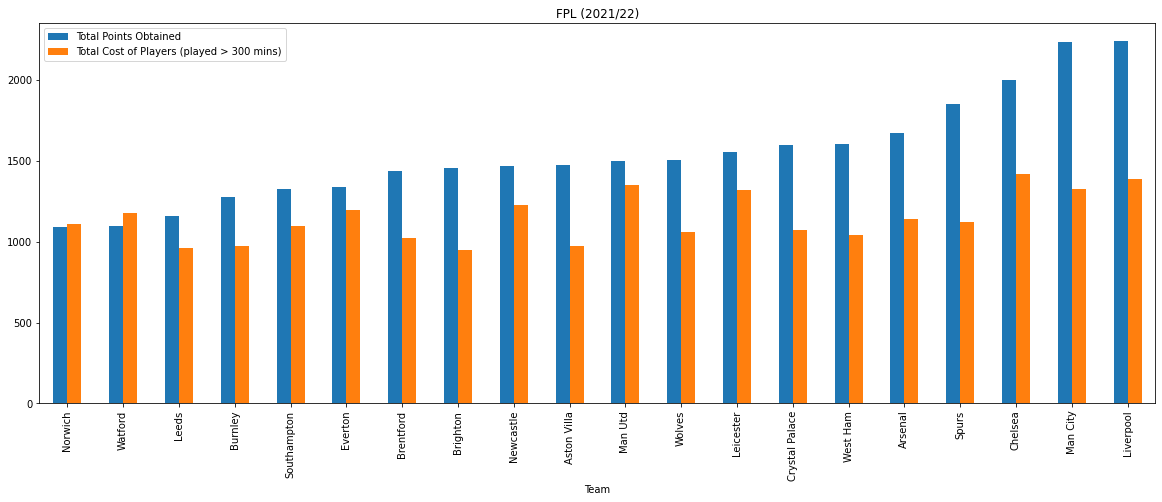

In [12]:
plot1 = plotingDf.groupby(['team_name']).sum().sort_values('total_points').plot(kind='bar', y=["total_points", "now_cost"], figsize=(20, 7), title='FPL (2021/22)')

plot1.legend(["Total Points Obtained", "Total Cost of Players (played > 300 mins)"])

plot1.set(xlabel="Team");

The above diagram is a plot of the total number of points that each team has obtained for all players that played more than 300 minutes in the league. This is in comparison to the total cost of the players of the same team who played more than 300 minutes in the league. This diagram shows that teams Chelsea, Liverpool, Man City, and Spurs have obtained significantly more points than the rest of the teams. While teams like Norwich, Watford, and Leeds obtained the least points. The data plot in the above diagram is from the 2021/22 season, hence we can compare it to the EPL table from the 2021/22 season shown below.


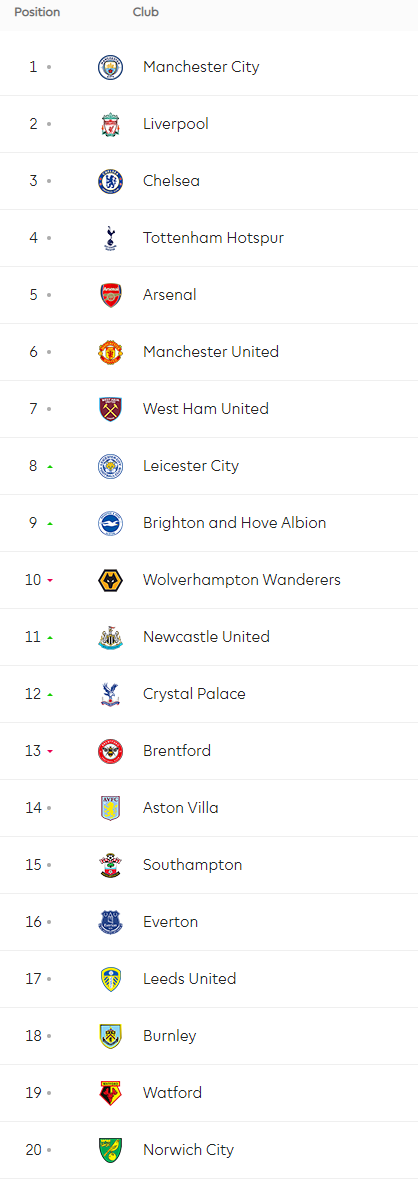

By comparing our plot and the EPL table, we can conclude that players from teams that are performing well in the EPL can obtain more points than players from teams that are not performing well. This can be seen from the fact that Chelsea, Liverpool, Man City, and Spurs are leading the league, while teams like Watford, Norwich, and Leeds are amongst the lower positions of the league.

Another interesting relationship that we can observe is the cost-to-point ratio. Since the total value of the participant's initial squad must not exceed £100 million, it is important to maximize the number of points obtained from the least amount spend per player. With this in mind, we can identify players from teams that are to be avoided. Teams like Man Utd and Everton have a higher cost than points obtained. Players from these teams are to be avoided as they are highly-priced but offer disproportional points in return. We can say that the return on investment (ROI) for players from these teams is low.

## 4.2 Amount of time played by players
Let's explore the relationship between the amount of time played by a player and the number of points the player can earn. In this section, we will use linear regression to help us see the trend line.

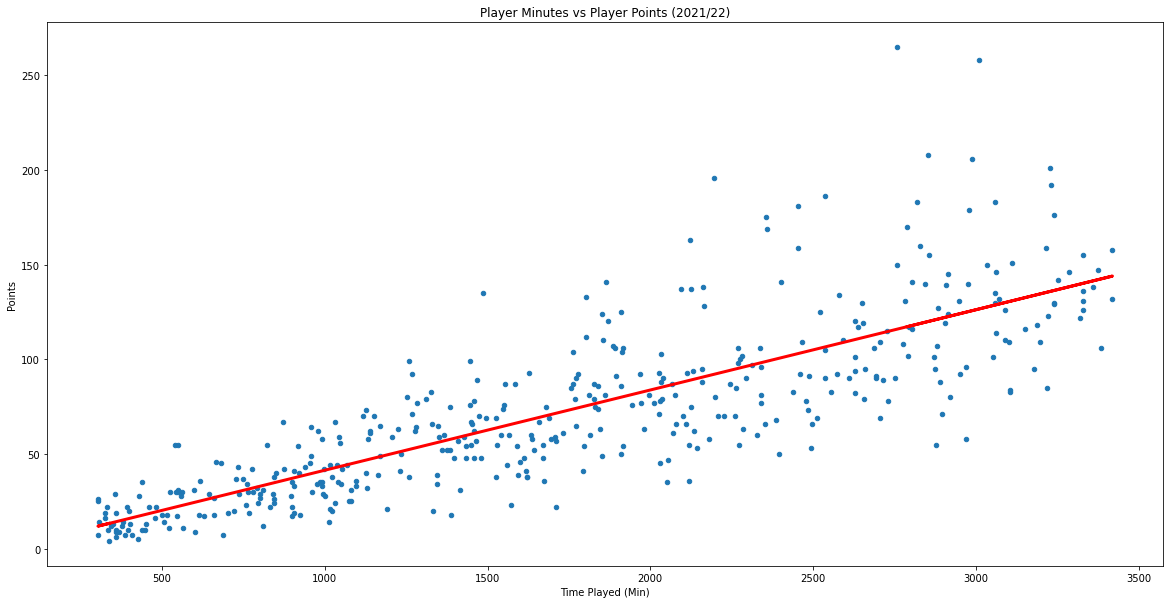

In [41]:
plot5 = plotingDf.plot.scatter(x='minutes', y = 'total_points', figsize=(20, 10), title = "Player Minutes vs Player Points (2021/22)")
plot5.set(xlabel="Time Played (Min)", ylabel="Points")

X = pd.DataFrame(plotingDf, columns=['minutes'])
y = pd.DataFrame(plotingDf, columns=['total_points'])
regression = LinearRegression()
regression.fit(X, y)

# Adding the regression line here:
plot5.plot(X, regression.predict(X), color='red', linewidth=3)


As seen from the linear regression line on the scatterplot above, we can tell that the number of minutes a player plays is strongly correlated to the number of points a player can earn throughout an FPL season.

## 4.3 Player count
Let's explore the relationship between number of players in a team and the cummulative ROI in the team in this section. In the previous section 4.1, the term 'return on investment (ROI)' was introduced. ROI can be calculated using the following formula:

player's ROI = player's points / player's cost

ROI is an effective way of calculating the efficiency or profitability of a player and compare the efficiency of a number of different players. In this section we will compare the relationship between the total number of players who played more that 300 mins in a team with the cummulative ROI of the team.

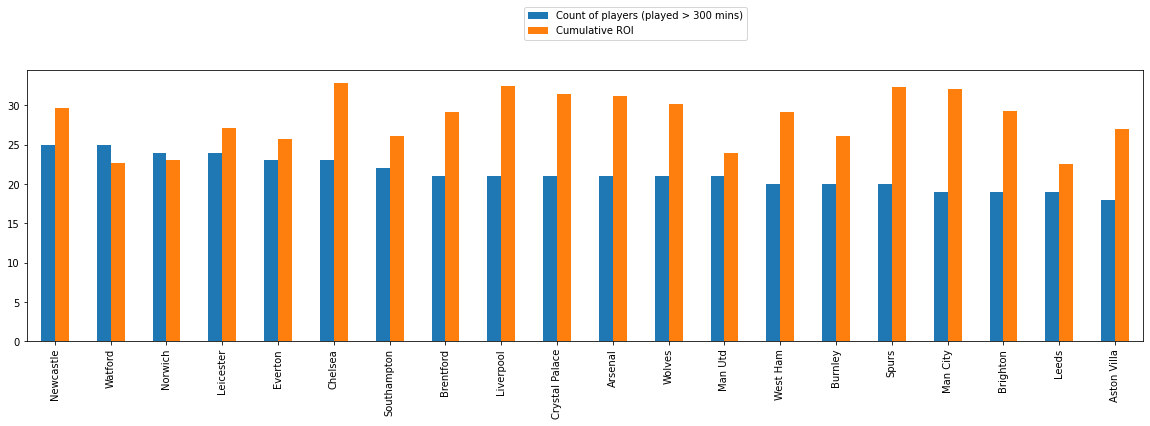

In [13]:
plotingDf2 = pd.DataFrame(columns = ['Player count','ROI'])
plotingDf2['Player count'] = plotingDf['team_name'].value_counts()
plotingDf2['Cum ROI'] = plotingDf.groupby(['team_name']).sum()['roi']

plot2 =plotingDf2[['Player count','Cum ROI']].plot(kind='bar',figsize=(20, 5))

plot2.legend(["Count of players (played > 300 mins)", "Cumulative ROI"],bbox_to_anchor =(0.65, 1.25));

The above diagram is plotted with teams with the number of players who played more than 300 mins from left to right. From the plot, we can tell that the teams with the most number of players who played more than 300 mins are Newcastle, Watford, Norwich, and Leceister. This suggests that the manager of those teams have been rotating the players often, therefore they have more players with more than 300 mins of game time. In the previous section, we established a relationship that the more minutes a player played he will earn more points.

Players from these teams with a high number of players are not a good investment as players from those teams are not playing all the time. It is a waste of investment if the player added to the squad sit on the bench frequently as they will not earn points while on the bench.

## 4.4 Player position
In this section we will explore the relationship between the player's position and points obtained to find out if we can identify which player position requires the most investment in FPL.

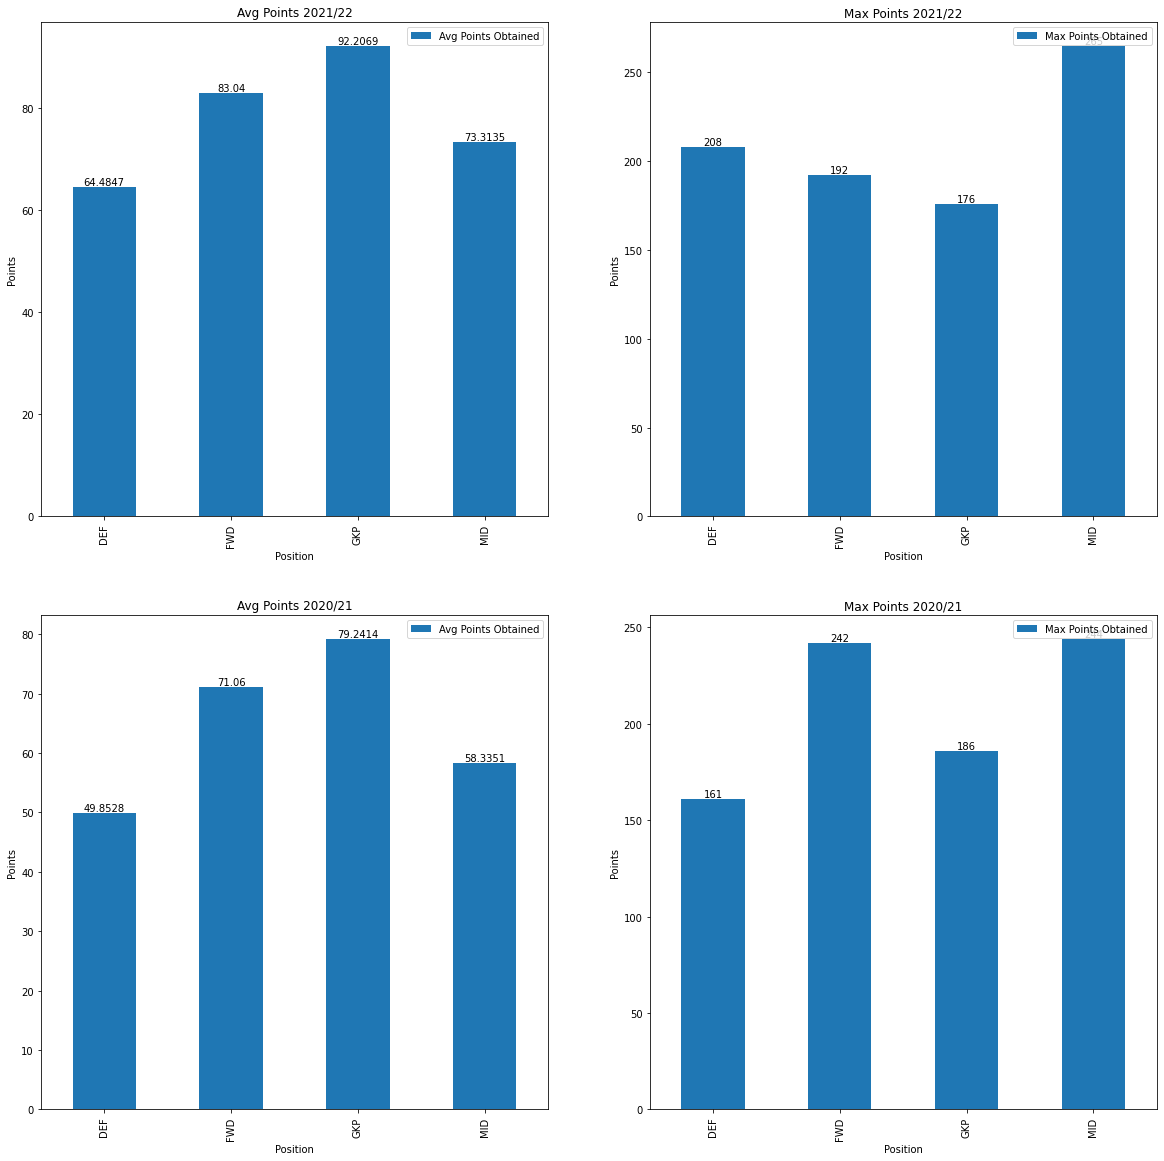

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

plotingDf3 = plotingDf.groupby(['position_name']).mean().plot(kind='bar', y="total_points", title='Avg Points 2021/22', ax=axes[0,0])
plotingDf3.legend(["Avg Points Obtained"])
plotingDf3.set(xlabel="Position", ylabel="Points")

for container in plotingDf3.containers:
    plotingDf3.bar_label(container)


plotingDf4 = plotingDf.groupby(['position_name']).max().plot(kind='bar', y="total_points", title='Max Points 2021/22', ax=axes[0,1])
plotingDf4.legend(["Max Points Obtained"])
plotingDf4.set(xlabel="Position", ylabel="Points")

for container in plotingDf4.containers:
    plotingDf4.bar_label(container)


plotingDf5 = plotingDf2020.groupby(['position_name']).mean().plot(kind='bar', y="total_points", title='Avg Points 2020/21', ax=axes[1,0])
plotingDf5.legend(["Avg Points Obtained"])
plotingDf5.set(xlabel="Position", ylabel="Points")

for container in plotingDf5.containers:
    plotingDf5.bar_label(container)


plotingDf6 = plotingDf2020.groupby(['position_name']).max().plot(kind='bar', y="total_points", title='Max Points 2020/21', ax=axes[1,1])
plotingDf6.legend(["Max Points Obtained"])
plotingDf6.set(xlabel="Position", ylabel="Points")

for container in plotingDf6.containers:
    plotingDf6.bar_label(container)

The above diagrams tells us that in both 2020/21 and 2021/22 players who played as goalkeeper and forward position earns the most points on average. 

In 2021/22, midfielders and defenders have the highest maximum points. In 2020/21, midfielders and forwards have the highest maximum points.

Hence, we can come to the conclusion that we should invest on better midfielders because players of those positions earn the least points on average but if the top midfielder is bought, they can earn the most ponts in FPL. 

## 4.5 Player Cost
In this section we will explore the relationship between the player's points and the player's cost.

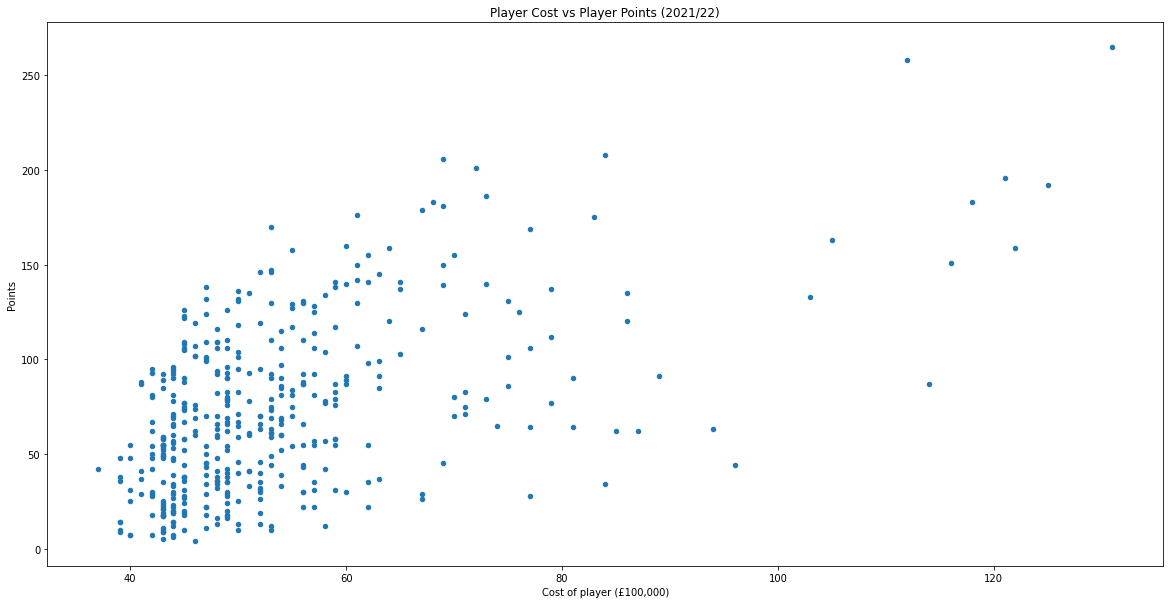

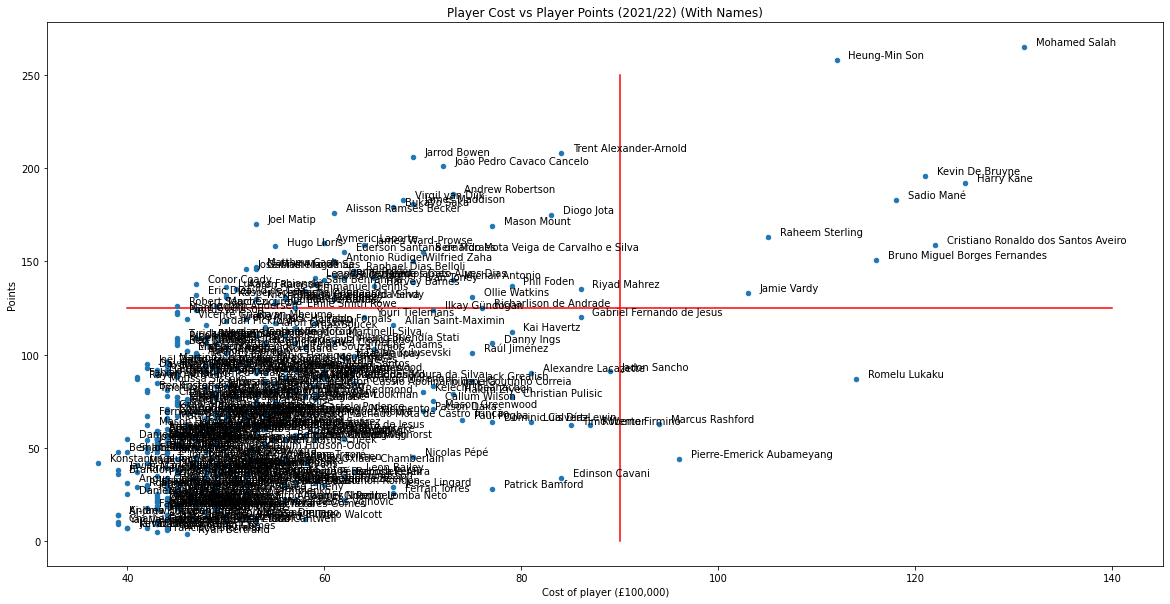

In [15]:
plot4 = plotingDf.plot.scatter(x='now_cost', y = 'total_points', figsize=(20, 10), title = "Player Cost vs Player Points (2021/22)")
plot4.set(xlabel="Cost of player (£100,000)", ylabel="Points")

plot3 = plotingDf.plot.scatter(x='now_cost', y = 'total_points', figsize=(20, 10), title = "Player Cost vs Player Points (2021/22) (With Names)")
plot3.set(xlabel="Cost of player (£100,000)", ylabel="Points")

for i, txt in enumerate(plotingDf.player_name):
   plot3.annotate(txt, (plotingDf.now_cost.iat[i]+1.2, plotingDf.total_points.iat[i]+1))

line1 = np.linspace(40, 140, 200)
x_line1 = np.linspace(125, 125, 200)

line2 = np.linspace(90, 90, 120)
x_line2 = np.linspace(0,250, 120)

plot3.plot(line1, x_line1, zorder=-1, color = 'red')
plot3.plot(line2, x_line2, zorder=-1, color = 'red');

The above diagram shows a scatter plot of players' cost and players' points. We can interpret the diagram by splitting it into 4 sections: bottom left, bottom right, upper left, and upper right.

From the diagram, we can observe that vast majority of the players belong to the bottom left of the scatter plot. These players are low cost and they earn a proportionally low amount of points. They can be classified as 'average players' and be added to the FPL squad as a cost saving alternative.

There are several players on the bottom right of the scatter plot. These players cost a lot but offer few points in return, these players can be classified as 'overvalued players'. These players are should be avoided as they do not return as many points as the FPL dollars spent on them. 

In the top left section of the scatter plot, there is a significant number of players. We aim to add as many of these players to our FPL squad as they cost relatively less and earn more points than most players. We can classify such players as 'undervalued players'.

Players at the top right of the scatter plot are the most expensive and the best players in the league. They cost a lot but offer high returns in points. These players are luxuries and it is best to have a few of them within our FPL squad as they can earn a lot of points. These players can be classified as the 'top-performing players'.


# 5 Fantasy Premier League Strategy
## 5.1 ROI selection strategy
During our analysis, we discussed several different types of player classifications in FPL, which are the average players, under-valued players, over-valued players, and the top-performing players. The strategy I aim to explore in this project is the 'ROI selection strategy'. The crux of this strategy is to select a team with a balance of under-valued players and top-performing players based on their Return on Investment. 

The ROI selection strategy defined below is inspired by Ahmad Chowdhury [[3]](#ref) selects 2 of the top-performing players and 13 under-valued players within budget. This strategy allows us to complete a team with a high chance of performing well for upcoming games.

In [16]:
def choose_team(playersDF):

    ## list to store players' name for visual purpose
    player_names = []

    ## list to store players' dataframe row use for calculation
    squad = []

    # Lists to store players according to their position
    gkp_squad = []
    def_squad = []
    mid_squad = []
    fwd_squad = []

    # Conditions for picking team
    total_points = 0
    budget = 1000
    top_player_limit = 2
    position_limit_dictionary = {"GKP": 2, "DEF": 5, "MID": 5, "FWD": 3} #Number of players we can pick from each position
    team_limit_dictionary = {} #Number of players we can pick from each team
   
    
    # Sort playersDF by points in descending order
    topPlayersDF = playersDF.sort_values(by='total_points', ascending=False)

    try:
        # Fill up team_limit_dictionary with team limits (3 from each team)
        team_list = playersDF['team_name'].unique()
        for value in team_list:
            team_limit_dictionary[value] = 3

        # Add top players into squad from topPlayersDF
        for idx, row in topPlayersDF.iterrows():
            if (
                # Check if budget, position, availability of player and team limit 
                # are of the right condition for new players to be added to the squad 
                budget >= row.now_cost
                and top_player_limit != 0
                and row.unavailable == False
                and position_limit_dictionary[row.position_name] != 0
                and row.team_name in team_limit_dictionary
                and team_limit_dictionary[row.team_name] != 0
            ):
                budget -= row.now_cost
                position_limit_dictionary[row.position_name] -= 1
                team_limit_dictionary[row.team_name] -= 1
                top_player_limit -= 1
                total_points += row.total_points
                squad.append(row)  # Add player's detail to squad list if chosen

                print("Top player chosen: " + str(row.player_name))

            elif top_player_limit == 0:
                break #Exit condition

        # Add undervalued players into squad from playersDF
        for idx, row in playersDF.iterrows():
            if (
                # Check if budget, position, availability of player and team limit 
                # are of the right condition for new players to be added to the squad 
                row.player_name not in player_names
                and budget >= row.now_cost
                and row.unavailable == False
                and position_limit_dictionary[row.position_name] != 0
                and team_limit_dictionary[row.team_name] != 0
            ):
                budget -= row.now_cost
                position_limit_dictionary[row.position_name] -= 1
                team_limit_dictionary[row.team_name] -= 1
                total_points += row.total_points
                squad.append(row) # Add player's detail to squad list if chosen
            
            elif sum (position_limit_dictionary.values()) == 0 :
                break # Exit condition


    except Exception as e:
        print(e)
        return

    # Sort out players picked into their positions
    for row in squad:
        player_names.append(row.player_name)

        if row.position_name == "GKP":
            gkp_squad.append([row.player_name, row.team_name])
        elif row.position_name == "DEF":
            def_squad.append([row.player_name, row.team_name])
        elif row.position_name == "MID":
            mid_squad.append([row.player_name, row.team_name])
        elif row.position_name == "FWD":
            fwd_squad.append([row.player_name, row.team_name])

    # Print out details
    print("\nPlayers chosen: " + str(player_names))
    print("Remaining Budget: " + str((budget / 10)) + "M")
    print("Total points from choosen team: " + str(total_points) + ".")
    print(position_limit_dictionary)

    print("GKP: " + str(gkp_squad))
    print("DEF: " + str(def_squad))
    print("MID: " + str(mid_squad))
    print("FWD: " + str(fwd_squad))




In [17]:
playersDF = pd.read_csv("playersData_2021-22.csv")
choose_team(playersDF)

Top player chosen: Mohamed Salah
Top player chosen: Heung-Min Son

Players chosen: ['Mohamed Salah', 'Heung-Min Son', 'Joel Matip', 'Jarrod Bowen', 'Conor Coady', 'Alisson Ramses Becker', 'Hugo Lloris', 'Eric Dier', 'João Pedro Cavaco Cancelo', 'Matthew Cash', 'Bukayo Saka', 'James Maddison', 'Teemu Pukki', 'Emmanuel Dennis', 'Cameron Archer']
Remaining Budget: 0.0M
Total points from choosen team: 2490.
{'GKP': 0, 'DEF': 0, 'MID': 0, 'FWD': 0}
GKP: [['Alisson Ramses Becker', 'Liverpool'], ['Hugo Lloris', 'Spurs']]
DEF: [['Joel Matip', 'Liverpool'], ['Conor Coady', 'Wolves'], ['Eric Dier', 'Spurs'], ['João Pedro Cavaco Cancelo', 'Man City'], ['Matthew Cash', 'Aston Villa']]
MID: [['Mohamed Salah', 'Liverpool'], ['Heung-Min Son', 'Spurs'], ['Jarrod Bowen', 'West Ham'], ['Bukayo Saka', 'Arsenal'], ['James Maddison', 'Leicester']]
FWD: [['Teemu Pukki', 'Norwich'], ['Emmanuel Dennis', 'Watford'], ['Cameron Archer', 'Aston Villa']]


After running the choose_team function above, we can see the details being printed.

Team chosen: ['Mohamed Salah', 'Heung-Min Son', 'Joel Matip', 'Jarrod Bowen', 'Conor Coady', 'Alisson Ramses Becker', 'Hugo Lloris', 'Eric Dier', 'João Pedro Cavaco Cancelo', 'Matthew Cash', 'Bukayo Saka', 'James Maddison', 'Teemu Pukki', 'Emmanuel Dennis', 'Cameron Archer']  

Remaining Budget: 0.0M  
Total points from choosen team: 2490.  
{'GKP': 0, 'DEF': 0, 'MID': 0, 'FWD': 0}  

GKP: [['Alisson Ramses Becker', 'Liverpool'], ['Hugo Lloris', 'Spurs']]  
DEF: [['Joel Matip', 'Liverpool'], ['Conor Coady', 'Wolves'], ['Eric Dier', 'Spurs'], ['João Pedro Cavaco Cancelo', 'Man City'], ['Matthew Cash', 'Aston Villa']]  
MID: [['Mohamed Salah', 'Liverpool'], ['Heung-Min Son', 'Spurs'], ['Jarrod Bowen', 'West Ham'], ['Bukayo Saka', 'Arsenal'], ['James Maddison', 'Leicester']]  
FWD: [['Teemu Pukki', 'Norwich'], ['Emmanuel Dennis', 'Watford'], ['Cameron Archer', 'Aston Villa']]


The algorithm uses data of all game weeks from the season 2021/22 to decide on this squad. This squad is selected with the benefit of hindsight and it is the best possible team in FPL that can be bought within FPL budget. Players in the squad can earn up to 2490 points if the participant use them for all 37 game weeks without changing. However, it is difficult to analyze the effectiveness our algorithm with just this. Hence, I created backtesting function for our algorithm below to provide further testing.

## Backtesting
In this section, we will backtest our algorithm. Below I defined the backtesting function. This function will analyze weekly data using the ROI selection strategy I defined in the previous section. The algorithm will predict the 'best team' for the next week through rigorous selection using limited data.

For example:  
In week 3, the algorithm only has access to data on what players have done in weeks 1, 2, and 3. It will use the data available and predict the best possible squad for week 4.

Finally, points calculation will be carried out to see how well the algorithm managed to predict the best squad for each week. One thing to take note of is that our algorithm will only begin picking a team after the first week of the FPL season as our algorithm requires data of players before it can pick players to add to the squad.

In [18]:
backtestDF = pd.read_csv("backTestData-1.csv")
backtestDF['roi'] = backtestDF['cum_points'] / backtestDF['value']
backtestDF = backtestDF.sort_values(by='roi', ascending=False) #Calculate ROI
backtestDF[backtestDF['round'] == 1].head() #Print the first few rows of the dataframe

,player_id,player_name,team_name,position_name,total_points,round,value,cum_points,roi
2994,527,Trevoh Chalobah,Chelsea,DEF,14,1,50,14,0.280000
2047,122,Marcos Alonso,Chelsea,DEF,15,1,55,15,0.272727
3185,91,Ethan Pinnock,Brentford,DEF,11,1,45,11,0.244444
1705,450,Emmanuel Dennis,Watford,FWD,12,1,50,12,0.240000
12343,207,Ricardo Domingos Barbosa Pereira,Leicester,DEF,12,1,55,12,0.218182


In [19]:
def backtest(backtestDF):
    round = backtestDF['round'].max()
    points_weekly = []
    picks = []
    
    #get weekly data from backtest data frame
    for i in range(1,round):
        # filter dataframe to only include data of that specific week (use for algorithm to choose team from)
        currentWeekDF = backtestDF[backtestDF['round'] == i]
        
        # filter dataframe to only include data of next week (use for score calculation of team from previous week)
        nextWeekDF = backtestDF[backtestDF['round'] == i+1]
        
        
        # List to store players picked
        squad = []
        names = []
        top_player_limit = 2
        
        # Team conditions for this specific week
        total_points = 0
        budget = 1000
        top_player_limit = 2
        
        # Ensure that multiple players of the same position dont get overSelected
        position_limit_dictionary = {"GKP": 2, "DEF": 5, "MID": 5, "FWD": 3} 
        
        # Ensure that multiple players of the same week dont get selected
        team_limit_dictionary = {}
        team_list = nextWeekDF['team_name'].unique()
        for value in team_list:
            team_limit_dictionary[value] = 3
            
            
        
        topPlayer = currentWeekDF.sort_values(by='cum_points', ascending=False).head(10)
        underValuedPlayer = currentWeekDF.sort_values(by='roi', ascending=False)
        
        # Choose top players according to conditions
        for idx, row in topPlayer.iterrows():
            if ( budget >= row.value
                and row.player_name not in names
                and top_player_limit != 0
                and position_limit_dictionary[row.position_name] != 0
                and row.team_name in team_limit_dictionary
                and team_limit_dictionary[row.team_name] != 0) :

                squad.append(row)
                names.append(row.player_name)
                budget -= row.value
                position_limit_dictionary[row.position_name] -= 1
                team_limit_dictionary[row.team_name] -= 1
                top_player_limit -= 1
        
        # Choose under valued players according to conditions
        for idx, row in underValuedPlayer.iterrows():
            if ( budget >= row.value
            and row.player_name not in names
            and position_limit_dictionary[row.position_name] != 0
            and row.team_name in team_limit_dictionary
            and team_limit_dictionary[row.team_name] != 0) :

                squad.append(row)
                names.append(row.player_name)
                budget -= row.value
                position_limit_dictionary[row.position_name] -= 1
                team_limit_dictionary[row.team_name] -= 1
                
            elif sum (position_limit_dictionary.values()) == 0 :
                break
        
        # Calculate total points that player scored in nextWeek
        for row in squad:
            df = nextWeekDF[nextWeekDF['player_id'] == row.player_id]
            total_points += df['total_points'].sum()

        picks.append(names)
        
        points_weekly.append(total_points) #Add this points obtained to an array
    
    
    for count, pick in enumerate(picks):
        print('Week: ',count+1)
        print('Squad Selected: ', pick, '\n')
        
    return points_weekly

And here we run the backtesting algorithm using the backtesting dataframe that we extracted from data extraction.

In [20]:
pts = backtest(backtestDF)

Week:  1
Squad Selected:  ['Bruno Miguel Borges Fernandes', 'Mohamed Salah', 'Trevoh Chalobah', 'Marcos Alonso', 'Ethan Pinnock', 'Emmanuel Dennis', 'Ricardo Domingos Barbosa Pereira', 'Paul Pogba', 'Saïd Benrahma', 'Sergi Canós', 'Hugo Lloris', 'Kasper Schmeichel', 'Michail Antonio', 'Eric Dier', 'Richarlison de Andrade'] 

Week:  2
Squad Selected:  ['Michail Antonio', 'Saïd Benrahma', 'Konstantinos Tsimikas', 'Shane Duffy', 'Hugo Lloris', 'Ethan Pinnock', 'Marcos Alonso', 'Reece James', 'David Raya Martin', 'Emmanuel Dennis', 'Paul Pogba', 'Sergi Canós', 'Mason Greenwood', 'Yves Bissouma', 'Danny Ings'] 

Week:  3
Squad Selected:  ['Michail Antonio', 'Mohamed Salah', 'Hugo Lloris', 'Pontus Jansson', 'Eric Dier', 'Sergio Reguilón', 'Konstantinos Tsimikas', 'Shane Duffy', 'Saïd Benrahma', 'David Raya Martin', 'Demarai Gray', 'Mason Greenwood', 'Pablo Fornals', 'Emmanuel Dennis', 'Gabriel Fernando de Jesus'] 

Week:  4
Squad Selected:  ['Michail Antonio', 'Mohamed Salah', 'Shane Duffy',

After running the back testing function, a list containing weekly points will be returned together with print statements of teams that our backtest function chose weekly. Below are the plots of points that the backtesting algorithm earned throughout 37 game weeks.

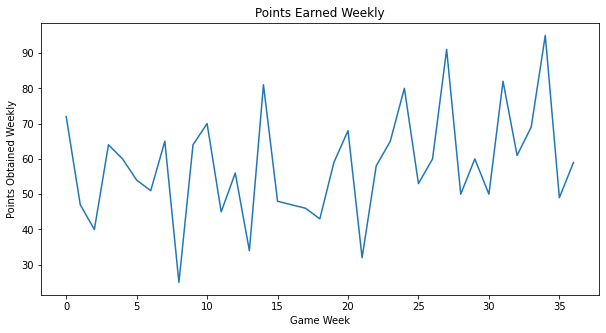

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(pts)
plt.ylabel('Points Obtained Weekly') 
plt.xlabel('Game Week') 
plt.title(label="Points Earned Weekly");

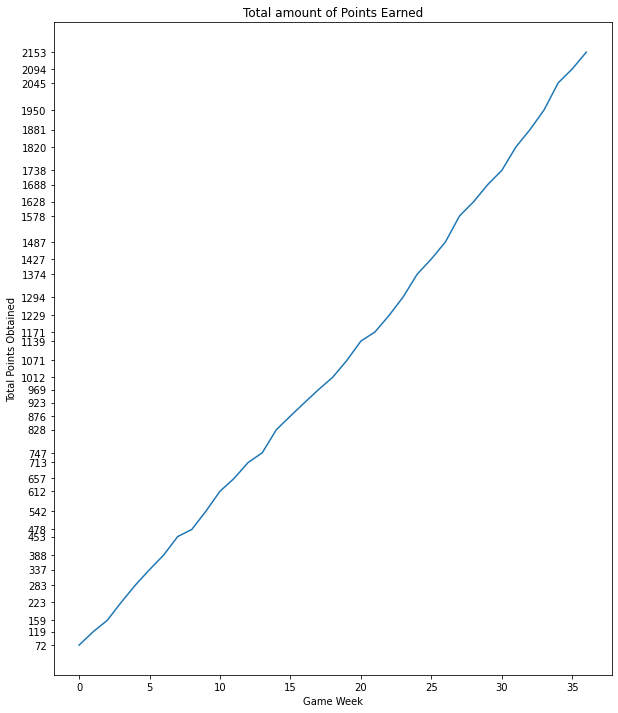

In [22]:
cummulativePts = np.cumsum(pts)
plt.figure(figsize=(10, 12))
plt.plot(cummulativePts)
plt.ylabel('Total Points Obtained') 
plt.xlabel('Game Week') 
plt.title(label="Total amount of Points Earned")
plt.yticks(ticks=cummulativePts);

According to the diagrams plotted above, our algorithm can earn up to 2153 points in 36 weeks. In the previous section, we ran the algorithm with all data from season 2021/22, and our algorithm picked the best team possible with all data available in hindsight which result in a total of 2490 points. Our algorithm earns 14% lesser points during the backtest with limited data available. This is quite impressive considering how well it can predict the perfect team. 

There are several FPL rules that I did not consider within this backtesting due to time and resource limitations, they are as follows:
1. Each additional transfer you make in the same Gameweek will deduct 4 points from your total score (Classic scoring) and match score (Head-to-Head scoring) at the start of the next Gameweek.
2. From your starting 11 you nominate a captain and a vice-captain. Your captain's score will be doubled.
3. Select 11 players by the Gameweek deadline to form your team, only players within the starting 11 will earn points to be added to your total score.
4. Usage of chips to potentially enhance your team's performance during the season.

There are also limitations in the backtesting dataset:
1. There are no data on player availability for each week hence the ROI selection algorithm may select unavailable players.

However, this shows us that our ROI selection algorithm is feasible in the selection of squad to a certain extent as our algorithm can earn significant amount of points.


# 6 Summary
## 6.1 Conclusions
Through the exploratory data analysis, we have been able to classify players into different classes. We can also see that there are relationships and trends within the data, one example is that points obtained by players are correlated to their team performance. Improvements can be made to increase the number of sample data from different seasons.

Within the project, it is possible to explore better backtesting methods as our back testing method is not a very accurate depiction of game rules. It is also possible to explore other forms of squad selection algorithms that can help users make more decisions in the game, such as deciding captaincy or the 11 players to field in FPL.

## 6.2 Summary of prepared data
### 6.2.1 Players dataframe:


In [23]:
playersDF21_22.columns

Index(['player_name', 'team_name', 'position_name', 'total_points', 'now_cost',
       'unavailable', 'minutes', 'player_id', 'roi'],
      dtype='object')

For the players dataframe:
- used in exploratory data analysis to plot different diagrams
- used to create backtesting dataframe
- used to demonstrate ROI selection strategy


### 6.2.2 Backtesting dataframe:

In [24]:
backtestdf.columns

Index(['player_id', 'player_name', 'team_name', 'position_name', 'round',
       'value', 'total_points', 'cum_points'],
      dtype='object')

For the backtesting dataframe:
- used in backtesting ROI selection strategy to demonstrate feasibility


# 7 Resources Used:

1. O’Brien JD, Gleeson JP, O’Sullivan DJP (2021) Identification of skill in an online game: The case of Fantasy Premier League. PLoS ONE 16(3): e0246698. https://doi.org/10.1371/journal.pone.0246698
2. The rules of Fantasy Premier League. (2022). Fantasy Premier League. Retrieved 2022, from https://fantasy.premierleague.com/help/terms
3. Chowdhury, A. (2020). fpl-teamSelector. Github. Retrieved 2022, from https://github.com/naquib555/fpl-teamSelector/blob/main/teamSelectorFPL.py
4. Kovachev, D. (2021, December 13). How our AI got Top 10 in the Fantasy Premier League using Data Science. Medium. Retrieved 2022, from https://towardsdatascience.com/how-our-ai-got-top-10-in-the-fantasy-premier-league-using-data-science-ba88b185b354
5. Byatt, C. (2021, December 16). Python for FPL(!) Data Analytics - Towards Data Science. Medium. Retrieved 2022, from https://towardsdatascience.com/python-for-fpl-data-analytics-dadb414ccefd
6. Premier League. (2022). Premier League Table, Form Guide & Season Archives. Retrieved 2022, from https://www.premierleague.com/tables

<a id='ref'></a>